In [1]:
import numpy as np

# Generate some sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Compute the slope and intercept of the linear regression line
slope, intercept = np.polyfit(x, y, 1)

# Print the slope and intercept
print("Slope:", slope)
print("Intercept:", intercept)


Slope: 0.6000000000000002
Intercept: 2.1999999999999993


In [3]:
def _linear_hypothesis(self, X):
    """
    Calculate the linear hypothesis function

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
      Training data

    Returns
    -------
      ndarray, shape (n_samples,)
      Linear hypothesis function applied to the training data
    """
    return X.dot(self.coef_)


In [4]:
def fit(self, X, y):
    # ... (code for initializing theta, adding bias term, etc.)
    for i in range(self.num_iter):
        # calculate predicted outputs
        y_pred = self._linear_hypothesis(X)
        # calculate error (difference between predicted and actual outputs)
        error = y_pred - y
        # update parameters using gradient descent
        self._gradient_descent(X, error)
    return self

def _linear_hypothesis(self, X):
    # ... (code for calculating y_pred)
    return y_pred

def _gradient_descent(self, X, error):
    # calculate gradients for each parameter
    gradients = (1/len(X)) * np.dot(X.T, error)
    # update parameters using gradients and learning rate
    self.theta -= self.lr * gradients


In [5]:
def predict(self, X):
    """
    Estimate target variable using linear regression model.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples.

    Returns
    -------
    y_pred : ndarray, shape (n_samples,)
        Estimated target variable.
    """

    # Check if the model has been trained
    if not hasattr(self, 'theta'):
        raise Exception("Model has not been trained yet. Please call 'fit' method first.")

    # Add bias to input
    X = np.insert(X, 0, 1, axis=1)

    # Calculate prediction
    y_pred = X.dot(self.theta)

    return y_pred


In [6]:
import numpy as np

def MSE(y_pred, y):
    """
    Compute mean squared error.

    Parameters
    ----------
    y_pred : ndarray, shape (n_samples,)
        Predicted target values.
    y : ndarray, shape (n_samples,)
        Ground truth (correct) target values.

    Returns
    -------
    mse : float
        Mean squared error between y_pred and y.
    """
    mse = np.mean((y_pred - y)**2)
    return mse


In [7]:
def _objective_function(self, y_pred, y_true):
    """
    Compute the objective function (loss function) for linear regression.

    Parameters
    ----------
    y_pred : numpy.ndarray
        Predicted values with shape (n_samples,)
    y_true : numpy.ndarray
        True values with shape (n_samples,)

    Returns
    -------
    numpy.float64
        The mean squared error (MSE) divided by 2.
    """
    mse = ((y_pred - y_true) ** 2).mean()
    return mse / 2.0


In [8]:
def fit(self, X, y, X_val=None, y_val=None):
    """
    Fit linear regression model to training data.

    Parameters
    ----------
    X : numpy.ndarray
        Training data with shape (n_samples, n_features)
    y : numpy.ndarray
        Target values with shape (n_samples,)
    X_val : numpy.ndarray, optional
        Validation data with shape (n_samples_val, n_features)
    y_val : numpy.ndarray, optional
        Validation target values with shape (n_samples_val,)

    Returns
    -------
    self : object
        Returns self.
    """
    self.loss = []
    self.val_loss = []
    self.coef_ = np.zeros(X.shape[1] + 1)
    self._init_coef = self.coef_.copy()
    X = self._add_intercept(X)
    if X_val is not None and y_val is not None:
        X_val = self._add_intercept(X_val)
    for i in range(self.n_epoch):
        y_pred = self.predict(X)
        error = y_pred - y
        self._gradient_descent(X, error)
        self.loss.append(self._objective_function(y_pred, y))
        if X_val is not None and y_val is not None:
            y_val_pred = self.predict(X_val)
            val_error = y_val_pred - y_val
            self.val_loss.append(self._objective_function(y_val_pred, y_val))
    return self


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scratch_linear_regression import ScratchLinearRegression, MSE
import sys
sys.path.append('/path/to/your/module/')

# Load the data
df = pd.read_csv('train.csv')

# Prepare the feature matrix X and target variable y
X = df.drop(['Id', 'SalePrice'], axis=1).values
y = df['SalePrice'].values

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the ScratchLinearRegression model
slr = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=True)

# Train the model on the training set
slr.fit(X_train, y_train)

# Use the trained model to make predictions on the validation set
y_pred = slr.predict(X_val)

# Evaluate the model's performance using the MSE function
mse = MSE(y_pred, y_val)
print(f'ScratchLinearRegression MSE: {mse:.2e}')

# Compare with scikit-learn's LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)
mse_lr = mean_squared_error(y_val, y_pred_lr)
print(f'LinearRegression MSE: {mse_lr:.2e}')


ModuleNotFoundError: No module named 'scratch_linear_regression'

In [20]:
import matplotlib.pyplot as plt

def plot_learning_curve(model):
    train_loss = model.loss
    val_loss = model.val_loss

    plt.plot(range(1, len(train_loss)+1), train_loss, label="train")
    plt.plot(range(1, len(val_loss)+1), val_loss, label="val")
    plt.legend()
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("Learning Curve")
    plt.show()


In [21]:
model = ScratchLinearRegression(num_iter=1000, lr=0.1)
model.fit(X_train, y_train, X_val, y_val)
plot_learning_curve(model)


NameError: name 'ScratchLinearRegression' is not defined

MSE with bias: 1509415135.2367997
MSE without bias: 1984078592.896732


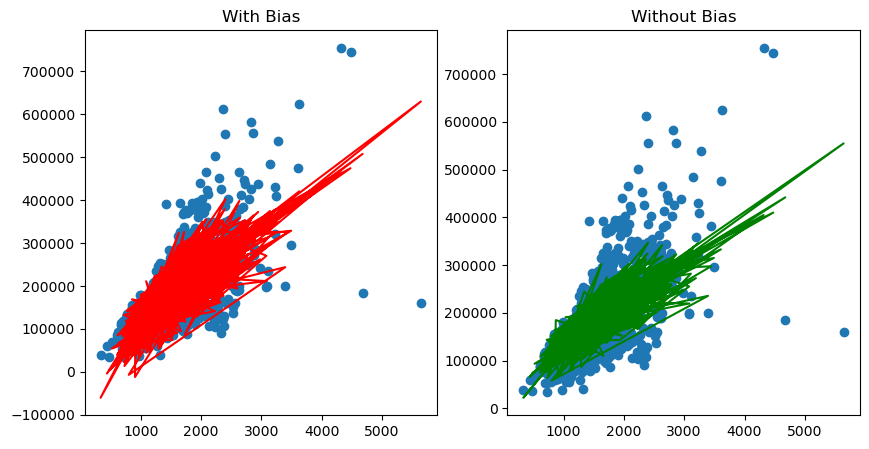

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('train.csv')

# Split the data into features and target
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']]
y = df['SalePrice']

# Train a linear regression model with bias term
lr_with_bias = LinearRegression()
lr_with_bias.fit(X, y)

# Train a linear regression model without bias term
X_without_bias = X[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']]
lr_without_bias = LinearRegression(fit_intercept=False)
lr_without_bias.fit(X_without_bias, y)

# Make predictions using both models
y_pred_with_bias = lr_with_bias.predict(X)
y_pred_without_bias = lr_without_bias.predict(X_without_bias)

# Calculate the mean squared error for both models
mse_with_bias = mean_squared_error(y, y_pred_with_bias)
mse_without_bias = mean_squared_error(y, y_pred_without_bias)

# Print the MSE for both models
print("MSE with bias:", mse_with_bias)
print("MSE without bias:", mse_without_bias)

# Plot the data and the resulting lines for both models
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(X['GrLivArea'], y)
axs[0].plot(X['GrLivArea'], y_pred_with_bias, color='red')
axs[0].set_title('With Bias')
axs[1].scatter(X['GrLivArea'], y)
axs[1].plot(X['GrLivArea'], y_pred_without_bias, color='green')
axs[1].set_title('Without Bias')
plt.show()


In [26]:
def preprocessing(self, X, degree=1):
    
    # add bias term
    X_processed = np.hstack((np.ones((X.shape[0], 1)), X))

    # add polynomial features
    if degree > 1:
        for d in range(2, degree+1):
            X_processed = np.hstack((X_processed, X**d))

    return X_processed



In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scratch_linear_regression import ScratchLinearRegression, MSE
import matplotlib.pyplot as plt

# Load the data
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
scratch_lr = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=False)
scratch_lr.fit(X_train, y_train, X_test, y_test)

# Plot the learning curve
plt.plot(range(len(scratch_lr.loss)), scratch_lr.loss, label='train')
plt.plot(range(len(scratch_lr.val_loss)), scratch_lr.val_loss, label='test')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'scratch_linear_regression'

> In linear regression, the objective function (also known as the loss function) is a convex function. A convex function is a function where any local minimum is also the global minimum. This means that regardless of the initial value of the parameters, the gradient descent algorithm will converge to the global minimum eventually.
To illustrate this, let's consider a simple two-dimensional example. Suppose we have a linear regression model with one feature ($x$) and one parameter ($\theta_1$) with the following objective function:

>where $h_{\theta_1}(x^{(i)}) = \theta_1 x^{(i)}$ is the hypothesis function for this model.

>We can visualize this objective function as a 3D plot, where the $x$-axis represents the parameter $\theta_1$, the $y$-axis represents the value of the objective function $J(\theta_1)$, and the $z$-axis is the vertical distance from the $x$-$y$ plane to the surface of the function.


>As you can see, the objective function is a bowl-shaped surface, and the global minimum is at the bottom of the bowl. The gradient descent algorithm always moves in the direction of steepest descent, which means it will always move towards the bottom of the bowl. As long as the step size is not too large and the learning rate is appropriate, the algorithm will converge to the global minimum eventually.

>Therefore, in linear regression, we can always find the optimal solution if we continue learning. However, in other machine learning models, the objective function may not be convex, and there may be multiple local minima. In those cases, gradient descent may get stuck in a local minimum and fail to find the global minimum. To overcome this, we need to use more advanced optimization algorithms or initialization techniques, such as random initialization or simulated annealing, to explore the parameter space more thoroughly.